In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.rename(columns={'Gender':'gender','Age':'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)' : 'score'},inplace=True)

In [5]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.shape

(200, 5)

In [7]:
df.isnull().values.any()

False

In [8]:
df .describe()

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


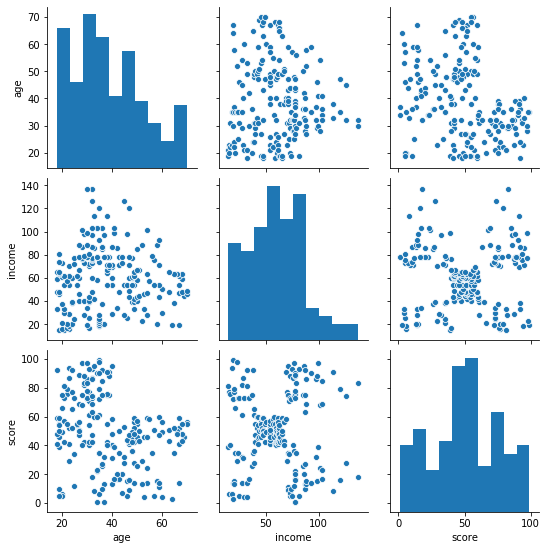

In [9]:
seaborn.pairplot(df[['age','income','score']])

## income and score

In [10]:
import sklearn.cluster as cluster

In [11]:
kmeans = cluster.KMeans(n_clusters=5)

In [12]:
kmeans = kmeans.fit(df[['income','score']])

In [13]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [14]:
df['income_clusters']=kmeans.labels_

In [15]:
df

,CustomerID,gender,age,income,score,income_clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


In [16]:
df['income_clusters'].value_counts()

2    81
1    39
0    35
4    23
3    22
Name: income_clusters, dtype: int64

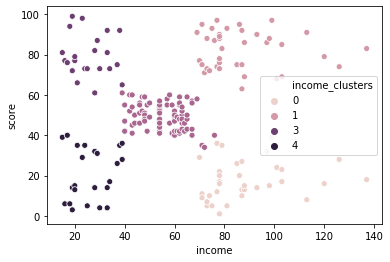

In [17]:
seaborn.scatterplot(x='income',y='score',hue='income_clusters',data=df)

## age and score

In [18]:
kmeans = cluster.KMeans(n_clusters=2)

In [19]:
kmeans = kmeans.fit(df[['age','score']])

In [20]:
kmeans.cluster_centers_

array([[28.95294118, 73.62352941],
       [46.16521739, 32.88695652]])

In [21]:
df['age_clusters']=kmeans.labels_

In [22]:
df['age_clusters'].value_counts()

1    115
0     85
Name: age_clusters, dtype: int64

In [23]:
df

,CustomerID,gender,age,income,score,income_clusters,age_clusters
0,1,Male,19,15,39,4,1
1,2,Male,21,15,81,3,0
2,3,Female,20,16,6,4,1
3,4,Female,23,16,77,3,0
4,5,Female,31,17,40,4,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0
196,197,Female,45,126,28,0,1
197,198,Male,32,126,74,1,0
198,199,Male,32,137,18,0,1


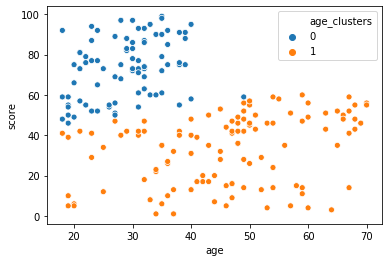

In [24]:
seaborn.scatterplot(x='age',y='score',hue='age_clusters',data=df)

In [25]:
from sklearn.cluster import KMeans




In [26]:
K_range = range(1,12)
wcss =[]

In [27]:
for k in K_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['income','score']])
    wcss.append(km.inertia_)

In [28]:
wcss

[269981.28,
 183069.17582751293,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25061.304119069333,
 21850.165282585633,
 20042.701454746802,
 18279.476559089846]

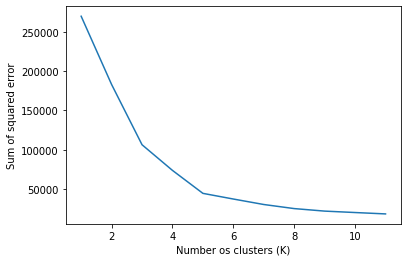

In [29]:
plt.xlabel('Number os clusters (K)')
plt.ylabel('Sum of squared error')
plt.plot(K_range,wcss)

## age and score

In [30]:
from sklearn.cluster import KMeans
K_range = range(1,12)
wcss =[]

In [31]:
for k in K_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['age','score']])
    wcss.append(km.inertia_)

In [32]:
wcss

[171535.5,
 75949.15601023017,
 45840.67661610867,
 28165.58356662934,
 23830.033602505428,
 19510.328802776174,
 15514.19313435103,
 13082.95148962149,
 11502.158993443205,
 10117.015200440715,
 9486.84018511445]

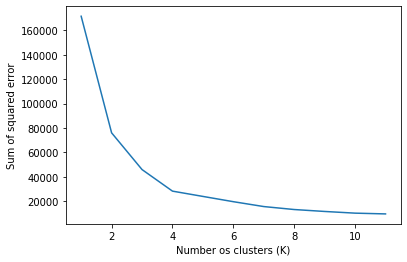

In [33]:
plt.xlabel('Number os clusters (K)')
plt.ylabel('Sum of squared error')
plt.plot(K_range,wcss)

## income and score

In [43]:
from sklearn.cluster import KMeans
K_range = range(1,12)
wcss =[]

In [44]:
for k in K_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['income','score']])
    wcss.append(km.inertia_)

In [45]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25028.02047526941,
 21826.936303231654,
 19657.783608703958,
 17879.128506711655]

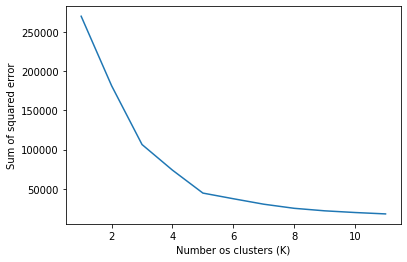

In [46]:
plt.xlabel('Number os clusters (K)')
plt.ylabel('Sum of squared error')
plt.plot(K_range,wcss)